Analyse de la dist. du vocabulaire

Gerer les stopswords

In [54]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import os
import yake

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [42]:
#jouer encore avec cela pour en ajouter des nouveaux en fonction du contexte, modifié de la liste de https://github.com/stopwords-iso/stopwords-fr?tab=readme-ov-file, à verifer sa fidelité
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", "elles",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", ":", "même", "voir", "fois", "jour", "année", "ans", "faites", "le", "la", "de"]

# New stopwords to add
git_stopwords = [
    "a", "abord", "absolument", "afin", "ah", "ai", "aie", "aient", "aies", "ailleurs", "ainsi", "ait", "allaient", "allo", "allons", "allô", "alors", "anterieur", "anterieure", "anterieures", "apres", "après", "as", "assez", "attendu", "au", "aucun", "aucune", "aucuns", "aujourd", "aujourd'hui", "aupres", "auquel", "aura", "aurai", "auraient", "aurais", "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autant", "autre", "autrefois", "autrement", "autres", "autrui", "aux", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez", "aviez", "avions", "avoir", "avons", "ayant", "ayez", "ayons", "bah", "bas", "basee", "bat", "beau", "beaucoup", "bien", "bigre", "bon", "boum", "bravo", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là", "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cependant", "certain", "certaine", "certaines", "certains", "certes", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "chacun", "chacune", "chaque", "cher", "chers", "chez", "chiche", "chut", "chère", "chères", "ci", "cinq", "cinquantaine", "cinquante", "cinquantième", "cinquième", "clac", "clic", "combien", "comme", "comment", "comparable", "comparables", "compris", "concernant", "contre", "couic", "crac", "dans", "de", "debout", "dedans", "dehors", "deja", "delà", "depuis", "dernier", "derniere", "derriere", "derrière", "des", "desormais", "desquelles", "desquels", "dessous", "dessus", "deux", "deuxième", "deuxièmement", "devant", "devers", "devra", "devrait", "different", "differentes", "differents", "différent", "différente", "différentes", "différents", "dire", "directe", "directement", "dit", "dite", "dits", "divers", "diverse", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dixième", "doit", "doivent", "donc", "dont", "dos", "douze", "douzième", "dring", "droite", "du", "duquel", "durant", "dès", "début", "désormais", "effet", "egale", "egalement", "egales", "eh", "elle", "elle-même", "elles", "elles-mêmes", "en", "encore", "enfin", "entre", "envers", "environ", "es", "essai", "est", "et", "etant", "etc", "etre", "eu", "eue", "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "eux-mêmes", "exactement", "excepté", "extenso", "exterieur", "eûmes", "eût", "eûtes", "f", "fais", "faisaient", "faisant", "fait", "faites", "façon", "feront", "fi", "flac", "floc", "fois", "font", "force", "furent", "fus", "fusse", "fussent", "fusses", "fussiez", "fussions", "fut", "fûmes", "fût", "fûtes", "gens", "haut", "hein", "hem", "hep", "holà", "hop", "hormis", "hors", "hou", "houp", "hue", "hui", "huit", "huitième", "hum", "hurrah", "hé", "hélas", "i", "ici", "il", "ils", "importe", "j", "je", "jusqu", "jusque", "juste", "la", "laisser", "laquelle", "las", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "longtemps", "lors", "lorsque", "lui", "lui-meme", "lui-même", "là", "lès", "ma", "maint", "maintenant", "mais", "malgre", "malgré", "maximale", "me", "meme", "memes", "merci", "mes", "mien", "mienne", "miennes", "miens", "mille", "mince", "mine", "minimale", "moi", "moi-meme", "moi-même", "moindres", "moins", "mon", "mot", "moyennant", "multiple", "multiples", "même", "mêmes", "na", "n'a" "naturel", "naturelle", "naturelles", "ne", "neanmoins", "necessaire", "necessairement", "neuf", "neuvième", "ni", "nombreuses", "nombreux", "nommés", "non", "nos", "notamment", "notre", "nous", "nous-mêmes", "nouveau", "nouveaux", "nul", "néanmoins", "nôtre", "nôtres", "oh", "ohé", "ollé", "olé", "on", "ont", "onze", "onzième", "ore", "ou", "ouf", "ouias", "oust", "ouste", "outre", "ouvert", "ouverte", "ouverts", "où", "paf", "par", "parce", "parfois", "parle", "parlent", "parler", "parmi", "parole", "parseme", "partant", "particulier", "particulière", "particulièrement", "pas", "passé", "pendant", "pense", "permet", "personne", "personnes", "peu", "peut", "peuvent", "peux", "pff", "pfft", "pfut", "pif", "pire", "pièce", "plein", "plouf", "plupart", "plus", "plusieurs", "plutôt", "possessif", "possessifs", "possible", "possibles", "pouah", "pour", "pourquoi", "pourrais", "pourrait", "pouvait", "prealable", "precisement", "premier", "première", "premièrement", "pres", "probable", "probante", "procedant", "proche", "près", "psitt", "pu", "puis", "puisque", "pur", "pure", "qu", "quand", "quant", "quant-à-soi", "quanta", "quarante", "quatorze", "quatre", "quatre-vingt", "quatrième", "quatrièmement", "que", "quel", "quelconque", "quelle", "quelles", "quelqu'un", "quelque", "quelques", "quels", "qui", "quiconque", "quinze", "quoi", "quoique", "r", "rare", "rarement", "rares", "relative", "relativement", "remarquable", "rend", "rendre", "restant", "reste", "restent", "restrictif", "retour", "revoici", "revoilà", "rien", "sa", "sacrebleu", "sait", "sans", "sapristi", "sauf", "se", "sein", "seize", "selon", "semblable", "semblaient", "semble", "semblent", "sent", "sept", "septième", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez", "serions", "serons", "seront", "ses", "seul", "seule", "seulement", "si", "sien", "sienne", "siennes", "siens", "sinon", "six", "sixième", "soi", "soi-même", "soient", "sois", "soit", "soixante", "sommes", "son", "sont", "sous", "souvent", "soyez", "soyons", "specifique", "specifiques", "speculatif", "stop", "strictement", "subtiles", "suffisant", "suffisante", "suffit", "suis", "suit", "suivant", "suivante", "suivantes", "suivants", "suivre", "sujet", "superpose", "sur", "surtout", "ta", "tac", "tandis", "tant", "tardive", "te", "tel", "telle", "tellement", "telles", "tels", "tenant", "tend", "tenir", "tente", "tes", "tic", "tien", "tienne", "tiennes", "tiens", "toc", "toi", "toi-même", "ton", "touchant", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "tres", "trois", "troisième", "troisièmement", "trop", "très", "tsoin", "tsouin", "tu", "té", "un", "une", "unes", "uniformement", "unique", "uniques", "uns", "va", "vais", "valeur", "vas", "vers", "via", "vif", "vifs", "vingt", "vivat", "vive", "vives", "vlan", "voici", "voie", "voient", "voilà", "voire", "vont", "vos", "votre", "vous", "vous-mêmes", "vu", "vé", "vôtre", "vôtres", "zut", "à", "â", "ça", "ès", "étaient", "étais", "était", "étant", "état", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "ô"
]

#domaine specific 
domaine_stopwords = [
"rue"
#garder les noms des villes pour faire une analyse spatiale? 
]

sw += git_stopwords
sw += domaine_stopwords
sw = set(sw)


print(f"{len(sw)} stopwords:\n {sorted(sw)}")

687 stopwords:
 [':', 'a', 'abord', 'absolument', 'afin', 'ah', 'ai', 'aie', 'aient', 'aies', 'ailleurs', 'ainsi', 'ait', 'allaient', 'allo', 'allons', 'allô', 'alors', 'année', 'ans', 'anterieur', 'anterieure', 'anterieures', 'apres', 'après', 'as', 'assez', 'attendu', 'au', 'aucun', 'aucune', 'aucuns', 'aujourd', "aujourd'hui", 'aupres', 'auquel', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autant', 'autre', 'autrefois', 'autrement', 'autres', 'autrui', 'aux', 'auxquelles', 'auxquels', 'avaient', 'avais', 'avait', 'avant', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bah', 'bas', 'basee', 'bat', 'beau', 'beaucoup', 'bien', 'bigre', 'bon', 'boum', 'bravo', 'c', 'car', 'ce', 'ceci', 'cela', 'celle', 'celle-ci', 'celle-là', 'celles', 'celles-ci', 'celles-là', 'celui', 'celui-ci', 'celui-là', 'celà', 'cent', 'cependant', 'certain', 'certaine', 'certa

Tokeniser le contenu du fichier

In [43]:
#créer un fichier bash qui concatène tous les fichiers txt de halley, merci les profs
path = "../../data/halley/halley_txt/" # Path to the directory containing text files

with open("../../data/halley/halley_all.txt", "w", encoding="utf-8") as output_file:
    for file in os.listdir(path):
        if file.endswith(".txt"):
            with open(os.path.join(path, file), "r", encoding="utf-8") as f:
                output_file.write(f.read())

In [44]:
# Récupération du contenu du fichier
path = "../../data/halley/halley_all.txt" 
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]

In [45]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")
words[:10] 

4858920 words found


['yF',
 ':',
 'LE',
 'DRAPEAU',
 'ROUGE',
 'Edison',
 'revendique',
 'la',
 'priorité',
 'de']

In [46]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")
kept[:10] #shows words after filtering stop words, much better
#these still aren't the words I'd expect... double check the source
#AH maybe it's because the WHOLE page isn't about halleys comet, so maybe those become stop words? 

1587544 words kept (220121 different word forms)


['drapeau',
 'rouge',
 'edison',
 'revendique',
 'priorité',
 'invention',
 'phonographe',
 'signalé',
 'dernièrement',
 'mort']

Récupérer les mots les plus fréquents afin d'en faire un plot

In [ ]:
fdist = nltk.FreqDist(kept)
fdist.most_common(20)
#à voir : soir, matin = seront pe liés au nom du journal et non du temps de la journée, define what a stopword means in this context

[('heures', 4175),
 ('bruxelles', 3613),
 ('mai', 3111),
 ('grand', 3095),
 ('prix', 2688),
 ('temps', 2602),
 ('lieu', 2568),
 ('comète', 2556),
 ('francs', 2549),
 ('soir', 2445),
 ('mois', 2363),
 ('grande', 2281),
 ('pays', 2235),
 ('paris', 2222),
 ('matin', 2082),
 ('belgique', 2075),
 ('jours', 2044),
 ('ministre', 1970),
 ('saint', 1967),
 ('cours', 1893)]

<AxesSubplot: xlabel='Samples', ylabel='Cumulative Counts'>

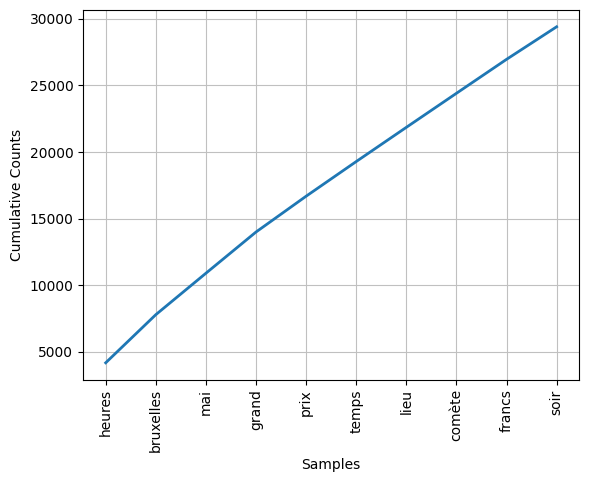

In [ ]:
# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=True)
#why is it so... linear ? I need to think about how to consider the surrounding text, as the pages are usually filled with other subjects than the commet
#and why is it increasing? There are almost have the instances of soir than heures 

In [ ]:
#les hapaux (n'apparaissent qu'une fois dans le corpus)
fdist.hapaxes()[:30]

#it looks like most of them are bad OCR, can I clean this somehow? 

['nographe',
 'anents',
 'sùliurique',
 'eiimiit',
 'oirenit',
 'vaseliner',
 'asselinér',
 'jouteuse',
 'sanderens',
 'hydrogénation',
 'tekkijue',
 'catalyseurs',
 'élucidé',
 'fciabatier',
 'banderons',
 'guzoline',
 'esserfce',
 'ttmpérauii',
 'rfuunlard',
 'arbeh',
 'premièj',
 'oppau',
 'eribourg',
 'jmarins',
 'nationalites',
 'redresseur',
 'électrolyse',
 'niqiiis',
 'verdie',
 'aperdevoir']

In [ ]:
#les mots les plus longs
n = 50
sorted(voc, key=len, reverse=True)[:n]
#oh TERRIBLE OCR, not a single word, but a couple of conjuctions at the end 

Keywords Analysis

In [56]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

# Lister les Fichiers
data_path = "../../data/halley/halley_txt/"
files = [f for f in os.listdir(data_path) if f.endswith('.txt')]